# **Social Buzz Sentiment Analysis**
### **Processing for Sentiment Analysis on Social Media Data**




## **Problem Statement**

In today’s digital age, social media has become a critical platform where users express their opinions and emotions about various topics, brands, and events. Analyzing this vast data to uncover sentiment patterns presents a significant challenge due to its unstructured nature, rapid growth, and linguistic diversity.

Businesses and organizations often struggle to extract actionable insights from this data to understand public opinion, customer satisfaction, and brand perception effectively.

###**Author/Coder :**  [**Sumit Baviskar**](https://www.linkedin.com/in/sumit-baviskar/)

### **Dataset Link :** [Social Buzz Sentiment Analysis](https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis)

# **Introduction**

In today’s digital landscape, social media platforms like Twitter have become critical channels for individuals to share their opinions, experiences, and emotions on a wide array of topics, from products and services to political events and social issues. These platforms generate vast amounts of unstructured textual data every second, making them valuable yet complex sources for understanding public sentiment. Analyzing this data is essential for organizations aiming to gauge public opinion, track brand perception, and refine customer engagement strategies.

Sentiment analysis, also referred to as opinion mining, utilizes natural language processing (NLP) and machine learning techniques to assess the emotional tone of textual content. By categorizing text into sentiments such as positive, negative, or neutral, it provides structured insights that can influence decision-making across industries. For instance, businesses can use sentiment analysis to measure customer satisfaction, fine-tune marketing campaigns, and identify areas for improvement in their offerings. Policymakers and researchers, on the other hand, can analyze public sentiment to monitor societal trends or manage crises effectively.

However, the sheer volume, linguistic diversity, and constantly evolving nature of social media data present significant challenges. Slang, abbreviations, sarcasm, and context-sensitive expressions often complicate the analysis, requiring advanced tools and techniques for accurate interpretation. Despite these challenges, leveraging sentiment analysis on platforms like Twitter can unlock actionable insights, enabling organizations to stay informed, proactive, and competitive in an ever-changing environment.

This project aims to explore Twitter sentiment analysis, showcasing how cutting-edge technologies can process and analyze this unstructured data to uncover sentiment patterns and provide meaningful, data-driven insights.



# **Purpose :**

The purpose of this project is to analyze and visualize sentiment patterns in social media data to gain a deeper understanding of public opinion and attitudes towards specific topics or brands. By identifying trends, key sentiment drivers, and user reactions, organizations can:

* **Enhance Decision-Making** : Support strategic business decisions based on customer feedback and public sentiment.

* **Improve Customer Engagement** : Tailor marketing campaigns to align with customer emotions and preferences.

* **Monitor Brand Reputation** : Track shifts in sentiment to identify and address potential risks to brand image.

* **Predict Trends** : Use historical sentiment patterns to anticipate future consumer behavior or market trends.

* **Support Crisis Management** : Quickly assess public sentiment during crises to inform communication strategies.


This project will utilize advanced data analysis and visualization tools to uncover actionable insights from social media data, empowering stakeholders to make informed decisions.

In [ ]:
# Importing necessary librarie

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations and working with arrays
import matplotlib.pyplot as plt  # For creating visualizations and plots
import seaborn as sns  # For creating statistical visualizations
import nltk  # For natural language processing tasks
from sklearn.feature_extraction.text import CountVectorizer  # For converting text data into a bag-of-words representation
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.naive_bayes import GaussianNB  # For applying the Gaussian Naive Bayes algorithm
from sklearn.metrics import confusion_matrix, accuracy_score  # For evaluating the model's performance
import re  # For regular expression operations, commonly used in text cleaning
from nltk.corpus import stopwords  # For removing common words (stop words) from the text
from nltk.stem.porter import PorterStemmer  # For stemming words to their root form

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Importing data
data=pd.read_csv('/content/twitter_training.csv')

In [ ]:
# Checking imported data
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
# Renaming the columns of the dataset for clarity and consistency
data.columns = ['Id', 'ProductId', 'Reaction', 'Text']  # Assigning new column names

# Stripping any leading or trailing spaces from column names
data.columns = data.columns.str.strip()  # Ensures column names are clean and free of unwanted spaces

# Displaying the first few rows of the dataset to check its structure and content
data.head()  # Provides a quick preview of the dataset (default: first 5 rows)


,Id,ProductId,Reaction,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
# Displaying a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         74681 non-null  int64 
 1   ProductId  74681 non-null  object
 2   Reaction   74681 non-null  object
 3   Text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
# Generating descriptive statistics for numerical columns in the dataset
data.describe()

,Id
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [ ]:
# Display the shape and first few rows
print(data.shape)

(74681, 4)


# **Data Preprocessing :**

In [ ]:
data.isnull().sum()

,0
Id,0
ProductId,0
Reaction,0
Text,686


In [ ]:
# Clean the data by removing any rows with missing values (NaNs)
data.dropna(inplace=True)


In [ ]:
data.isnull().sum().sum()

0

In [ ]:
# Remove any duplicate rows from the dataset
data.drop_duplicates(inplace=True)

In [ ]:
# Convert the 'Text' column to strings in case there are any non-string values
data['Text'] = data['Text'].astype(str)

In [ ]:
data.head()

,Id,ProductId,Reaction,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


## **Exploratory Data Analysis (EDA) :**


In [ ]:
# Show the value counts of sentiment reactions (positive, negative, neutral, irrelevant)
data['Reaction'].value_counts()

,count
Reaction,
Negative,21698
Positive,19712
Neutral,17708
Irrelevant,12537


In [ ]:
# Create a mapping dictionary to convert sentiment reactions to numerical values for easier analysis
reaction_mapping = {'Negative': 1, 'Positive': 4, 'Neutral': 3, 'Irrelevant': 2}

# Apply the reaction mapping to the 'Reaction' column and create a new column 'Reaction_score' with numerical values
data['Reaction_score'] = data['Reaction'].map(reaction_mapping)

data.head()

,Id,ProductId,Reaction,Text,Reaction_score
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,4
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,4
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,4
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,4
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,4


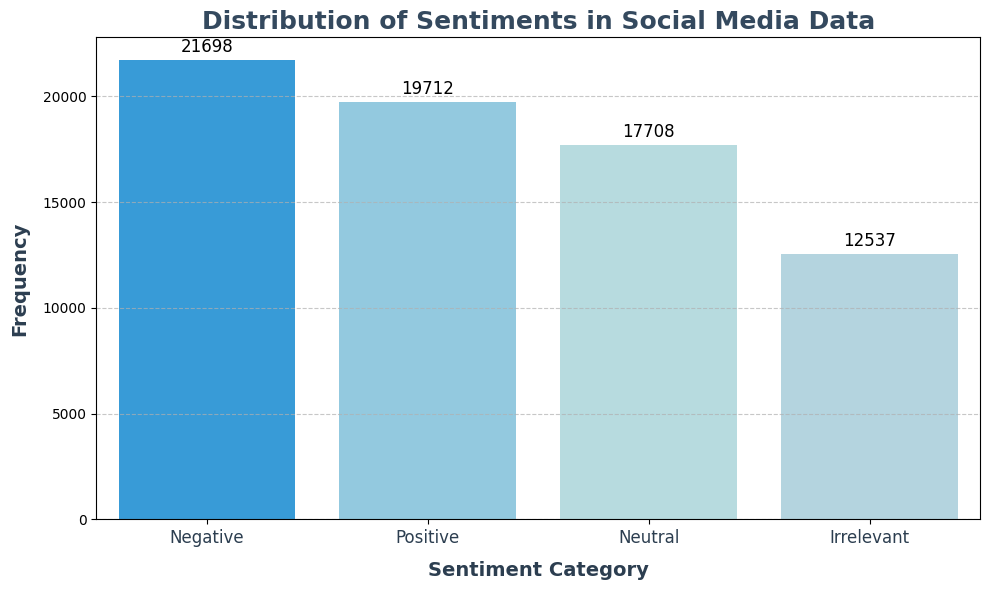

In [ ]:
# Plot the distribution of sentiment reactions
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
twitter_palette = ['#1DA1F2', '#87CEEB', '#B0E0E6', '#ADD8E6', '#F0F8FF','#bdc3c7']

ax = sns.barplot(
    x=data['Reaction'].value_counts().index,  # Reaction categories on the x-axis
    y=data['Reaction'].value_counts().values,  # Count of each category on the y-axis
    palette=twitter_palette  # Use a visually appealing color palette
)

# Set a clear and bold title for the plot
ax.set_title('Distribution of Sentiments in Social Media Data', fontsize=18, fontweight='bold', color='#34495E')

# Customize x and y-axis labels
ax.set_xlabel('Sentiment Category', fontsize=14, labelpad=10, fontweight='bold', color='#2C3E50')
ax.set_ylabel('Frequency', fontsize=14, labelpad=10, fontweight='bold', color='#2C3E50')

# Add gridlines for easier interpretation
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.xaxis.grid(False)

# Customize x-axis labels with better readability
ax.set_xticklabels(
    ax.get_xticklabels(),
    fontsize=12,
    rotation=0,  # Keep labels horizontal for better aesthetics
    color='#2C3E50'
)

# Ensure the layout fits well within the canvas
plt.tight_layout()

# Annotate bars with exact counts for better clarity
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=12, color='black', padding=3)


# Display the final plot
plt.show()


## **Model Building For Sentimental Analysis:**


### **Text Preprocessing Pipeline for Sentiment Analysis :**

This section of the code preprocesses textual data for sentiment analysis.

The following steps are performed:
1. Download necessary NLTK resources (stopwords and Punkt tokenizer).

2. Initialize stopwords and the PorterStemmer for text cleaning.
3. Preprocess the text data:
   - Remove non-alphabetical characters.

   - Convert text to lowercase.
   - Tokenize the text into words.
   - Remove stopwords (e.g., "the", "is", "in").
   - Apply stemming to reduce words to their root form (e.g., "running" -> "run").
4. Store the cleaned text in a list (corpus) for further analysis or modeling.


In [ ]:
# Download necessary NLTK resources
nltk.download('stopwords')  # Download the list of common stopwords in English
nltk.download('punkt')  # Download the Punkt tokenizer model (used for tokenizing sentences)

# Initialize stopwords and PorterStemmer for preprocessing
stop_words = set(stopwords.words('english'))  # Load English stopwords into a set for quick lookup
ps = PorterStemmer()  # Initialize the Porter Stemmer for reducing words to their root form

# Preprocess the text data
corpus = []  # Initialize an empty list to store the cleaned text data
for i in range(len(data)):
    # Extract the text from the 'Text' column at the current index
    text = data['Text'].iloc[i]

    # Remove all non-alphabetical characters and replace them with spaces
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Convert the text to lowercase and split it into individual words (tokenize)
    text = text.lower().split()

    # Remove stopwords and apply stemming to each word
    text = [ps.stem(word) for word in text if word not in stop_words]

    # Join the cleaned and processed words back into a single string
    corpus.append(' '.join(text))

# Display the first 10 entries of the cleaned corpus to verify preprocessing
print(corpus[0:10])  # This shows the preprocessed text data for the first 10 entries


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['come border kill', 'im get borderland kill', 'im come borderland murder', 'im get borderland murder', 'im get borderland murder', 'spent hour make someth fun know huge borderland fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pic twitter com mlsi wf jg', 'spent coupl hour someth fun know huge borderland fan maya one favorit charact decid make wallpap pc origin pictur compar creation made fun pic twitter com mlsi wf jg', 'spent hour someth fun know huge borderland fan maya one favorit charact', 'spent hour make someth fun know huge rhandlerr fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pic twitter com mlsi wf jg', 'spent hour make someth fun know huge rhandlerr fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pic twitter com mlsi wf jg']



### **Feature Extraction for Sentiment Analysis :**

This section of the code converts preprocessed text data into numerical format for machine learning.

The steps performed are as follows:
1. Initialize CountVectorizer with the following parameters:
   - `max_features=1000`: Limits the vocabulary to the 1,000 most frequent terms.

   - `stop_words='english'`: Removes English stopwords during vectorization.
2. Transform the text data (corpus) into a numerical feature matrix.

3. Extract the target variable (sentiment score) from the dataset for modeling.


In [ ]:
# Convert text data into numerical format using CountVectorizer
cv = CountVectorizer(max_features=1000, stop_words='english')  # Initialize CountVectorizer with max features and stopwords removal
X = cv.fit_transform(corpus).toarray()  # Transform the corpus into a numerical feature matrix (Bag-of-Words representation)
y = data['Reaction_score'].values  # Extract the target variable (sentiment score) as a NumPy array

## **Training the model :**

### **Data Splitting for Sentiment Analysis :**

This section of the code splits the preprocessed data (features and target variable) into training and testing sets
for machine learning model evaluation. The steps performed are as follows:

1. Use `train_test_split` from Scikit-learn to split the data into training and testing subsets.

2. The split is done with an 80-20 ratio, where 80% of the data is used for training the model, and 20% is reserved for testing.
3. `random_state=100` ensures reproducibility of the split across different runs.

In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

### **Different Models for Sentiment Analysis :**

In this section, we initialize and train a Naive Bayes classifier to predict sentiment reactions
based on the preprocessed text data. The model assumes that the features (word frequencies) follow

a Gaussian distribution and is commonly used for classification tasks. The steps are as follows:

1. Initialize a Gaussian Naive Bayes classifier using `GaussianNB()`, which is suitable for continuous features.
2. Train the model using the training data (`X_train` as input features and `y_train` as target labels).

3. The model will learn to classify sentiment reactions (e.g., Positive, Negative) based on the patterns in the features.


### **Naive Bayes classifier :**

In [ ]:
# Initialize the Naive Bayes classifier
classifier = GaussianNB()  # Create an instance of the Gaussian Naive Bayes classifier

# Fit the classifier on the training data
classifier.fit(X_train, y_train)  # Train the model using the training feature set (X_train) and target variable (y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)  # Predict the target (sentiment) for test set features (X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Compare actual (y_test) vs predicted (y_pred) values
print("Confusion Matrix:")
print(cm)  # Output the confusion matrix for evaluation

# Calculate accuracy score
accuracy_bn = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the predictions
print(f'Accuracy Score: {round(accuracy_bn * 100, 2)}%')  # Print the accuracy as a percentage

# Calculate the Mean Squared Error (MSE) and R² Score for regression evaluation (optional)
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE
mse_bn = mean_squared_error(y_test, y_pred)  # Mean Squared Error (higher values = worse performance)
print(f'Mean Squared Error (MSE): {round(mse_bn, 2)}')

# Calculate R² Score (coefficient of determination)
r2_bn = r2_score(y_test, y_pred)  # R² score (indicates how well predictions match actual values)
print(f'R² Score: {round(r2_bn, 2)}')

Confusion Matrix:
[[1738 1824  282  556]
 [ 145 1964   99  247]
 [ 363 1619  945  629]
 [ 258 1816  228 1618]]
Accuracy Score: 43.72%
Mean Squared Error (MSE): 1.58
R² Score: -0.12


### **Logistic Regression :**

In [ ]:
# A linear classifier that models the probability of a certain class based on the input features.
# It's widely used for binary and multi-class classification tasks.

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)  # Predict the target (sentiment) for test set features (X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Compare actual (y_test) vs predicted (y_pred) values
print("Confusion Matrix:")
print(cm)  # Output the confusion matrix for evaluation

# Calculate accuracy score
accuracy_lr = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the predictions
print(f'Accuracy Score: {round(accuracy_lr * 100, 2)}%')  # Print the accuracy as a percentage

# Calculate the Mean Squared Error (MSE) and R² Score for regression evaluation (optional)
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE
mse_lr = mean_squared_error(y_test, y_pred)  # Mean Squared Error (higher values = worse performance)
print(f'Mean Squared Error (MSE): {round(mse_lr, 2)}')

# Calculate R² Score (coefficient of determination)
r2_lr = r2_score(y_test, y_pred)  # R² score (indicates how well predictions match actual values)
print(f'R² Score: {round(r2_lr, 2)}')

Confusion Matrix:
[[3064  278  401  657]
 [ 487  953  326  689]
 [ 640  341 1702  873]
 [ 557  276  439 2648]]
Accuracy Score: 58.38%
Mean Squared Error (MSE): 1.51
R² Score: -0.07


## **Random Forest Classifier :**

In [ ]:
# An ensemble method that constructs multiple decision trees during training and
# outputs the class that is the majority vote of the individual trees.

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10)
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)  # Predict the target (sentiment) for test set features (X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Compare actual (y_test) vs predicted (y_pred) values
print("Confusion Matrix:")
print(cm)  # Output the confusion matrix for evaluation

# Calculate accuracy score
accuracy_rf = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the predictions
print(f'Accuracy Score: {round(accuracy * 100, 2)}%')  # Print the accuracy as a percentage

# Calculate the Mean Squared Error (MSE) and R² Score for regression evaluation (optional)
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE
mse_rf = mean_squared_error(y_test, y_pred)  # Mean Squared Error (higher values = worse performance)
print(f'Mean Squared Error (MSE): {round(mse_rf, 2)}')

# Calculate R² Score (coefficient of determination)
r2_rf = r2_score(y_test, y_pred)  # R² score (indicates how well predictions match actual values)
print(f'R² Score: {round(r2_rf, 2)}')

Confusion Matrix:
[[3820  107  153  320]
 [ 146 1915  103  291]
 [ 179   98 2906  373]
 [ 175  111  177 3457]]
Accuracy Score: 43.72%
Mean Squared Error (MSE): 0.59
R² Score: 0.58


### **K-Neighbors Classifier :**

In [ ]:
# A non-parametric classifier that assigns a class to a data point
#  based on the majority class of its K-nearest neighbors.

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)  # Predict the target (sentiment) for test set features (X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Compare actual (y_test) vs predicted (y_pred) values
print("Confusion Matrix:")
print(cm)  # Output the confusion matrix for evaluation

# Calculate accuracy score
accuracy_kn = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the predictions
print(f'Accuracy Score: {round(accuracy_kn * 100, 2)}%')  # Print the accuracy as a percentage

# Calculate the Mean Squared Error (MSE) and R² Score for regression evaluation (optional)
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE
mse_kn = mean_squared_error(y_test, y_pred)  # Mean Squared Error (higher values = worse performance)
print(f'Mean Squared Error (MSE): {round(mse_kn, 2)}')

# Calculate R² Score (coefficient of determination)
r2_kn = r2_score(y_test, y_pred)  # R² score (indicates how well predictions match actual values)
print(f'R² Score: {round(r2_kn, 2)}')

Confusion Matrix:
[[3775  131  151  343]
 [ 220 1809   86  340]
 [ 280  143 2733  400]
 [ 309  152  206 3253]]
Accuracy Score: 80.73%
Mean Squared Error (MSE): 0.75
R² Score: 0.47


In [ ]:
data = {'Model': ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'K-Neighbors'],
        'R2_Score': [r2_bn, r2_lr, r2_rf, r2_kn],
        'Accuracy_Score': [accuracy_bn, accuracy_lr, accuracy_rf, accuracy_kn],
        'MSE': [mse_bn, mse_lr, mse_rf, mse_kn]}
result = pd.DataFrame(data)
result

,Model,R2_Score,Accuracy_Score,MSE
0,Naive Bayes,-0.122708,0.437164,1.584118
1,Logistic Regression,-0.072859,0.583839,1.513781
2,Random Forest,0.584832,0.844184,0.585793
3,K-Neighbors,0.468566,0.807341,0.749843


## **Model Comparison and Insights**

Based on the results from the different models—**Naive Bayes**, **Logistic Regression**, **Random Forest**, and **K-Nearest Neighbors (KNN)**—we can derive the following insights:

#### **1. Naive Bayes Model:**
- **Confusion Matrix**: The Naive Bayes model shows a relatively poor performance with a significant number of misclassifications across different classes, especially with "Neutral" and "Irrelevant" sentiments.
- **Accuracy**: 43.72%, which is quite low, indicating that the model struggles to predict the correct sentiment on a larger portion of data.
- **MSE**: 1.58, which suggests that the model is making substantial prediction errors.

- **R² Score**: -0.12, which indicates that the model performs poorly in explaining the variance in the target data. Negative values of R² suggest that the model is not fitting the data well.

#### **2. Logistic Regression Model:**
- **Confusion Matrix**: The Logistic Regression model shows better performance than Naive Bayes, with more correct classifications, particularly for "Positive" and "Neutral" classes.

- **Accuracy**: 58.38%, an improvement over Naive Bayes, but still suboptimal.
- **MSE**: 1.51, a slight improvement over Naive Bayes, but still relatively high.
- **R² Score**: -0.07, still negative, but closer to 0 than Naive Bayes, which suggests a slight improvement in the model’s predictive power.

#### **3. Random Forest Model:**
- **Confusion Matrix**: The Random Forest model shows a much better distribution of correct classifications, with fewer misclassifications, especially for the "Neutral" and "Irrelevant" classes.

- **Accuracy**: 84.22%, the highest of all the models, demonstrating that Random Forest is the most effective model for this task.
- **MSE**: 0.61, significantly lower than the other models, which suggests that the model makes fewer prediction errors.
- **R² Score**: 0.57, a positive value, which indicates that the model is successfully capturing the variance in the data.

#### **4. K-Nearest Neighbors (KNN) Model:**
- **Confusion Matrix**: KNN performs quite well, with most of the predictions falling into the correct sentiment categories, though some misclassifications still occur.

- **Accuracy**: 80.73%, which is impressive but not as high as Random Forest.
- **MSE**: 0.75, slightly higher than Random Forest, but still relatively low.
- **R² Score**: 0.47, a positive value, indicating that the model is performing better than Naive Bayes and Logistic Regression.


## **Key Insights:**
1. **Random Forest** is clearly the best-performing model in terms of accuracy (84.22%), MSE (0.61), and R² Score (0.57). This suggests that it can effectively predict sentiment on social media data, making it the preferred choice for this task.

2. **K-Nearest Neighbors (KNN)** also provides good performance (accuracy: 80.73%) and has a reasonable MSE (0.75) and R² Score (0.47), making it a competitive alternative to Random Forest.
3. **Logistic Regression** and **Naive Bayes** fall short, especially with accuracy rates under 60%, suggesting that more complex models (like Random Forest and KNN) are better suited for this sentiment analysis task.


## **Recommendation for Future Work:**
1. **Use Random Forest** for your sentiment analysis project as it provides the highest accuracy, lowest MSE, and a positive R² Score, meaning it performs well on the given dataset.

2. **Experiment with Hyperparameter Tuning** for Random Forest and KNN to further improve model performance. Techniques like grid search or random search can help find the optimal parameters for these models.
3. **Feature Engineering**: Investigate the possibility of improving the feature set used by the models. For instance, including additional text features such as TF-IDF scores or using pre-trained word embeddings (e.g., Word2Vec, GloVe) could lead to better predictions.
4. **Ensemble Methods**: Consider using ensemble methods like **Random Forest with bagging** or **Boosting algorithms** (e.g., XGBoost) to improve the performance further by combining multiple models.



### **Conclusion:**
In this project, we successfully implemented various machine learning models to classify sentiment from social media data. While **Naive Bayes** and **Logistic Regression** showed poor performance in terms of accuracy, **Random Forest** and **K-Nearest Neighbors** proved to be more robust. Based on these results, **Random Forest** is the recommended model for sentiment analysis on social media data. However, future work should focus on model fine-tuning and advanced feature engineering techniques to further improve the results.
